# packing

In [34]:
# import time
# import datetime
# import msgpack
# # record starting time as file name
# start_time = time.time()
# timestr = datetime.datetime.fromtimestamp(
#     start_time).strftime("%Y%m%d-%H%M%S.%f")
# # example format: '20190915-034034.694503'

# n_data = list(range(13))
# n_data[0] = datetime.datetime.now().timestamp()
# # create a file
# file_name = "TMP\{}.mp".format(timestr)
# file = open(file_name, "wb+")
# packer = msgpack.Packer(use_bin_type=True)

# for k in range(1000):
#     file.write(packer.pack(n_data))
# file.close()

In [35]:
import datetime
import time
print(datetime.datetime.now().timestamp())
print(time.time())

1606342911.122942
1606342911.1229424


# Unpacking

In [36]:
import glob
import msgpack
import pandas as pd
import numpy as np
import numba as nb
import itertools
from collections import defaultdict
pd.set_option('display.max_columns', None) # show all columns

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

In [37]:
data_folder = "..\\data\\"

file_name_list = glob.glob(f"{data_folder}*.mp")
print(file_name_list)
file_name = file_name_list[-1]

with open(file_name, "rb+") as file:
    unpacker = msgpack.Unpacker(file, raw=False,use_list=False)
    columns = unpacker.unpack()
    print(columns)
    data = [o for o in unpacker]
    data = data[:-1] # drop last row

def GetLen(d):
    """
    get length of any object
    """
    try: 
        return len(d)
    except TypeError:
        return 1
# benchmarking https://medium.com/@shmulikamar/python-serialization-benchmarks-8e5bb700530b

for c,d in zip(columns,data[0]):
    print(c,GetLen(d))

['..\\data\\20201125-054510.229297.mp', '..\\data\\20201125-063811.063451.mp', '..\\data\\20201125-064909.165522.mp', '..\\data\\20201125-074639.498363.mp']
('t', 'joint_pos', 'joint_vel', 'actuation', 'orientation', 'ang_vel', 'com_acc', 'com_vel', 'com_pos', 'cmd')
t 1
joint_pos 4
joint_vel 4
actuation 4
orientation 6
ang_vel 3
com_acc 3
com_vel 3
com_pos 3
cmd 4


In [38]:
ID =defaultdict(None,{name: k  for k,name in enumerate(columns)})
print(ID)

defaultdict(None, {'t': 0, 'joint_pos': 1, 'joint_vel': 2, 'actuation': 3, 'orientation': 4, 'ang_vel': 5, 'com_acc': 6, 'com_vel': 7, 'com_pos': 8, 'cmd': 9})


In [39]:
df = pd.DataFrame(data,columns=columns)#,dtype=float)
df

,t,joint_pos,joint_vel,actuation,orientation,ang_vel,com_acc,com_vel,com_pos,cmd
0,192.554000,"(-1.1201930691777595, -2.6391780385853036, -1....","(-14.291289154169661, 0.41231135315644707, 14....","(-0.1806746863256217, 0.007787831642320925, 0....","(0.930232453200817, -0.16028639464670275, 0.33...","(5.443262234663499, 2.0547698195523334, 1.6891...","(11.523704823907188, -10.827955220302085, -8.1...","(0.39480777358403135, -0.06180933252415833, -0...","(5.423304557810521, -14.156126059484953, 0.113...","(-14.740162188500383, 0.6141756073063434, 12.8..."
1,192.560000,"(-1.2061906866252181, -2.636911291695525, -1.0...","(-12.747480541522526, 0.14059408560185283, 11....","(-0.20008343825627156, 0.013091306786355396, 0...","(0.935888501558971, -0.15510619083788058, 0.31...","(4.8462628623135835, 1.9214971822635505, 1.798...","(-2.6107514446992535, -5.569256913590625, -11....","(0.37914326491583583, -0.09522487400570208, -0...","(5.4255717780090285, -14.156559078984488, 0.10...","(-14.740162188500383, 0.6141756073063434, 12.8..."
2,192.566000,"(-1.2932207246580354, -2.6350822037470047, -1....","(-15.0970817933741, 0.2636711060790553, 13.055...","(-0.1803410865877425, 0.015460641190382894, 0....","(0.940722739520467, -0.15129869549079228, 0.30...","(4.952338161125307, 1.8681489547682792, 1.4422...","(4.0951046574343355, 0.3683262263881419, -12.7...","(0.40371389286044185, -0.09301491664737323, -0...","(5.42792654072373, -14.157069341744709, 0.1054...","(-14.740162188500383, 0.6141756073063434, 12.8..."
3,192.572000,"(-1.379201774616974, -2.6338935502842857, -0.9...","(-14.405388084832493, 0.2936166485314473, 13.4...","(-0.19164438214646295, 0.0199424554692181, 0.1...","(0.9465980849947551, -0.14741476554520905, 0.2...","(4.973943309855279, 2.5639225208524956, 1.6319...","(9.113055930847787, -2.0921905995425623, -17.5...","(0.45839222844552857, -0.1055680602446286, -0....","(5.430615339937444, -14.157758016573213, 0.100...","(-14.740162188500383, 0.6141756073063434, 12.8..."
4,192.578000,"(-1.4713431030032615, -2.631628991634972, -0.8...","(-8.457331988928063, 0.2193725237704669, 6.978...","(-0.24137697595263058, 0.023364380236482667, 0...","(0.9514389745855452, -0.14483585035025184, 0.2...","(3.6653842637369545, 2.370565924599686, 1.2468...","(-2.822511566470509, 2.743341013988568, -7.247...","(0.4414571590467055, -0.08910801416069719, -0....","(5.433297485037896, -14.158355775286198, 0.095...","(-14.740162188500383, 0.6141756073063434, 12.8..."
...,...,...,...,...,...,...,...,...,...,...
2503205,15211.706002,"(2.2769183599363294, -2.265663617906821, -1.93...","(-1.6749960244972772, 7.735157988095542, -11.3...","(-0.4464489657250878, 0.25386647724679684, -0....","(-0.894103104583824, -0.4469445184395332, 0.02...","(-0.2891848595024642, -0.5591592908002727, 1.6...","(7.339625939615454, -2.930436468261816, -17.02...","(-0.0487162148581528, -0.0344120424329742, 0.1...","(-26.562770372007705, 3.565835837108985, 0.035...","(-21.911111918288924, 6.902769809298665, -8.41..."
2503206,15211.712002,"(2.144572269187732, -2.2341783310792134, -1.98...","(-21.741792930392688, 9.269110697832872, -11.7...","(-0.25314560352243953, 0.25818575487863177, -0...","(-0.8954480552232917, -0.4442545250535705, 0.0...","(-1.2452532108072851, -0.01722365907864117, 0....","(4.743744419416175, 14.309668743106567, -10.47...","(-0.020253748341655747, 0.0514459700256652, 0....","(-26.563029859643404, 3.5658699998600025, 0.03...","(-21.911111918288924, 6.902769809298665, -8.41..."
2503207,15211.718002,"(2.0417350535711765, -2.2009978057130155, -2.0...","(-26.953638564892746, 3.350148925503449, -5.57...","(-0.25805437688185207, 0.3304374562085539, -0....","(-0.9006563656282408, -0.4340130106200013, 0.0...","(1.062542240229394, -1.1669538743670163, 1.939...","(0.6910987245655897, -6.133908480837886, -4.81...","(-0.01610715599426221, 0.014642519140637885, 0...","(-26.56309634943834, 3.565867233464112, 0.0362...","(-21.911111918288924, 6.902769809298665, -8.41..."
250

In [40]:
freq_control_measured = (len(df.index)-1)/(df['t'].iloc[-1] - df['t'].iloc[0])
freq_control_ideal = 5/3*100
percent_packet_lost = (1- freq_control_measured/freq_control_ideal)*100
print(f"Control loop frequency:{freq_control_measured:.2f} Hz, {percent_packet_lost:.2f}% packet lost")

Control loop frequency:166.67 Hz, -0.00% packet lost


In [41]:
def FlatViewConverter(data, columns):
    """
    create a flat view of the data, **assuming the the first column is a scalar (time t)**
    Input:
        data: a list of list generated by the msgpack unpacker
        columns: the names of the unflattened columns
    Output:
        data_flat: a flat view of the data (numpy)
        columns_flat: a flat view of the columns
        columns_index: the start and end index of respective element in columns
        columns_len: the lenth of the respective element in columns, i.e. the vector length
                     of the represented list in the respective column
    """
    columns_len = np.array([GetLen(d) for d in data[0]])
    n_rows = len(data)
    n_cols = sum(columns_len)
    columns_index = np.zeros(len(columns_len)+1, dtype=int)
    columns_index[1:] = np.cumsum(columns_len)

    data_flat = np.empty((n_rows, n_cols), dtype=np.float64)
    # convert columns[1:] to flatten view, equivalent to:
    # np.asarray([[item for sublist in row[1:] for item in sublist] for row in data],dtype=np.float64)
    it = itertools.chain.from_iterable(
        (itertools.chain(*row[1:]) for row in data))
    data_flat[:, 1:] = np.fromiter(it, dtype=np.float64).reshape(
        (-1, n_cols-1))  # rest columns
    data_flat[:, 0] = np.fromiter(
        (row[0] for row in data), dtype=np.float64)  # fist column
    
    columns_flat = list(itertools.chain.from_iterable(itertools.chain(
        (f"{c}_{k}" if cl > 1 else c for k in range(cl))) for c, cl in zip(columns, columns_len)))
    return data_flat, columns_flat, columns_index, columns_len

data_flat, columns_flat, columns_index, columns_len = FlatViewConverter(data,columns)
# print(columns_flat)

In [42]:
print(dict(enumerate(columns_flat)))

{0: 't', 1: 'joint_pos_0', 2: 'joint_pos_1', 3: 'joint_pos_2', 4: 'joint_pos_3', 5: 'joint_vel_0', 6: 'joint_vel_1', 7: 'joint_vel_2', 8: 'joint_vel_3', 9: 'actuation_0', 10: 'actuation_1', 11: 'actuation_2', 12: 'actuation_3', 13: 'orientation_0', 14: 'orientation_1', 15: 'orientation_2', 16: 'orientation_3', 17: 'orientation_4', 18: 'orientation_5', 19: 'ang_vel_0', 20: 'ang_vel_1', 21: 'ang_vel_2', 22: 'com_acc_0', 23: 'com_acc_1', 24: 'com_acc_2', 25: 'com_vel_0', 26: 'com_vel_1', 27: 'com_vel_2', 28: 'com_pos_0', 29: 'com_pos_1', 30: 'com_pos_2', 31: 'cmd_0', 32: 'cmd_1', 33: 'cmd_2', 34: 'cmd_3'}


In [43]:
# # preprocess:
# # estimate com_acc from com_pos
# com_acc = data_flat[:,columns_index[ID["com_acc"]]:columns_index[ID["com_acc"]+1]]
# com_vel = data_flat[:,columns_index[ID["com_vel"]]:columns_index[ID["com_vel"]+1]]
# t = data_flat[:,columns_index[ID["t"]]]
# dt = (t[1:]-t[:-1])
# com_acc_bw = (com_vel[1:]-com_vel[:-1])/dt[:, None]
# data_flat[:-1,columns_index[ID["com_acc"]]:columns_index[ID["com_acc"]+1]] = com_acc_bw
# data_flat = data_flat[:-1][np.all(com_acc_bw<100,axis=1)]




In [44]:
df = pd.DataFrame(data_flat,columns=columns_flat)
df

,t,joint_pos_0,joint_pos_1,joint_pos_2,joint_pos_3,joint_vel_0,joint_vel_1,joint_vel_2,joint_vel_3,actuation_0,actuation_1,actuation_2,actuation_3,orientation_0,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,ang_vel_0,ang_vel_1,ang_vel_2,com_acc_0,com_acc_1,com_acc_2,com_vel_0,com_vel_1,com_vel_2,com_pos_0,com_pos_1,com_pos_2,cmd_0,cmd_1,cmd_2,cmd_3
0,192.554000,-1.120193,-2.639178,-1.169742,0.267282,-14.291289,0.412311,14.239816,-6.803564,-0.180675,0.007788,0.136393,-0.087945,0.930232,-0.160286,0.330115,0.276545,0.897516,-0.343492,5.443262,2.054770,1.689167,11.523705,-10.827955,-8.111881,0.394808,-0.061809,-0.617764,5.423305,-14.156126,0.113715,-14.740162,0.614176,12.880938,-6.984519
1,192.560000,-1.206191,-2.636911,-1.091801,0.225052,-12.747481,0.140594,11.031567,-6.245130,-0.200083,0.013091,0.165779,-0.092660,0.935889,-0.155106,0.316314,0.259507,0.910756,-0.321216,4.846263,1.921497,1.798036,-2.610751,-5.569257,-11.255690,0.379143,-0.095225,-0.685298,5.425572,-14.156559,0.109773,-14.740162,0.614176,12.880938,-6.984519
2,192.566000,-1.293221,-2.635082,-1.010137,0.181852,-15.097082,0.263671,13.055073,-7.567039,-0.180341,0.015461,0.138093,-0.077568,0.940723,-0.151299,0.303561,0.244351,0.923024,-0.297185,4.952338,1.868149,1.442296,4.095105,0.368326,-12.780477,0.403714,-0.093015,-0.761981,5.427927,-14.157069,0.105403,-14.740162,0.614176,12.880938,-6.984519
3,192.572000,-1.379202,-2.633894,-0.934110,0.140214,-14.405388,0.293617,13.428106,-6.757380,-0.191644,0.019942,0.136935,-0.085814,0.946598,-0.147415,0.286742,0.228200,0.934597,-0.272861,4.973943,2.563923,1.631919,9.113056,-2.092191,-17.506967,0.458392,-0.105568,-0.867023,5.430615,-14.157758,0.100547,-14.740162,0.614176,12.880938,-6.984519
4,192.578000,-1.471343,-2.631629,-0.858825,0.096235,-8.457332,0.219373,6.978579,-3.915855,-0.241377,0.023364,0.202343,-0.108991,0.951439,-0.144836,0.271637,0.216186,0.942560,-0.254645,3.665384,2.370566,1.246855,-2.822512,2.743341,-7.247541,0.441457,-0.089108,-0.910508,5.433297,-14.158356,0.095210,-14.740162,0.614176,12.880938,-6.984519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503205,15211.706002,2.276918,-2.265664,-1.939089,0.679351,-1.674996,7.735158,-11.397610,-5.897160,-0.446449,0.253866,-0.061414,-0.053488,-0.894103,-0.446945,0.028640,-0.447627,0.893875,-0.024862,-0.289185,-0.559159,1.688167,7.339626,-2.930436,-17.027052,-0.048716,-0.034412,0.144818,-26.562770,3.565836,0.035074,-21.911112,6.902770,-8.419461,-11.269586
2503206,15211.712002,2.144572,-2.234178,-1.983180,0.615603,-21.741793,9.269111,-11.715198,-7.667901,-0.253146,0.258186,-0.070653,-0.043970,-0.895448,-0.444255,0.028473,-0.444813,0.895453,-0.017481,-1.245253,-0.017224,0.501725,4.743744,14.309669,-10.473119,-0.020254,0.051446,0.081979,-26.563030,3.565870,0.035802,-21.911112,6.902770,-8.419461,-11.269586
2503207,15211.718002,2.041735,-2.200998,-2.033160,0.559024,-26.953639,3.350149,-5.570773,-12.252547,-0.258054,0.330437,-0.130354,-0.021272,-0.900656,-0.434013,0.021232,-0.434446,0.900374,-0.024143,1.062542,-1.166954,1.939474,0.691099,-6.133908,-4.810599,-0.016107,0.014643,0.053116,-26.563096,3.565867,0.036286,-21.911112,6.902770,-8.419461,-11.269586
2503208,15211.724002,1.912914,-2.149894,-2.096909,0.505961,-21.485310,6.989968,-9.877962,-10.636935,-0.315326,0.277178,-0.063951,-0.064496,-0.905920,-0.423122,0.016642,-0.423414,0.905655,-0.022570,-0.300799,-0.717892,2.033248,10.711436,6.209668,13.220584,0.048161,0.051901,0.132439,-26.562980,3.566073,0.036801,-21.911112,6.902770,-8.419461,-11.269586


In [45]:
df.describe()

,t,joint_pos_0,joint_pos_1,joint_pos_2,joint_pos_3,joint_vel_0,joint_vel_1,joint_vel_2,joint_vel_3,actuation_0,actuation_1,actuation_2,actuation_3,orientation_0,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,ang_vel_0,ang_vel_1,ang_vel_2,com_acc_0,com_acc_1,com_acc_2,com_vel_0,com_vel_1,com_vel_2,com_pos_0,com_pos_1,com_pos_2,cmd_0,cmd_1,cmd_2,cmd_3
count,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06,2.503210e+06
mean,7.702180e+03,4.138016e-03,-2.771669e-03,-3.477561e-03,-7.444569e-03,-9.143773e-02,8.638605e-02,1.552027e-01,1.217371e-01,-1.902246e-03,1.135974e-03,1.960620e-03,1.534367e-03,1.291546e-02,-8.006569e-03,2.705663e-03,5.816755e-03,-1.139318e-02,-1.346101e-04,1.062860e-02,1.329282e-02,4.130374e-03,-4.201809e-05,2.317383e-05,2.490293e-04,-2.119995e-03,1.171871e-03,-3.318430e-05,-1.289631e+01,-1.840010e+01,1.072753e-01,-8.950308e-02,8.638349e-02,1.561649e-01,1.218178e-01
std,4.335687e+03,1.815371e+00,1.814516e+00,1.808066e+00,1.818123e+00,1.468474e+01,1.475579e+01,1.466130e+01,1.469575e+01,2.317877e-01,2.349098e-01,2.336013e-01,2.362306e-01,6.620828e-01,6.668127e-01,3.417152e-01,6.667490e-01,6.628520e-01,3.404552e-01,6.444366e+00,4.339345e+00,2.577464e+00,2.201549e+01,2.206059e+01,3.456062e+01,3.398811e-01,3.393477e-01,5.158446e-01,1.889054e+01,1.108608e+01,5.529117e-02,1.444676e+01,1.443982e+01,1.438901e+01,1.446134e+01
min,1.925540e+02,-3.141592e+00,-3.141591e+00,-3.141592e+00,-3.141591e+00,-6.632067e+01,-6.980259e+01,-7.400663e+01,-7.353281e+01,-1.000000e+00,-9.797680e-01,-9.933133e-01,-1.000000e+00,-9.999999e-01,-1.000000e+00,-9.999992e-01,-1.000000e+00,-9.999997e-01,-9.999987e-01,-4.380549e+01,-4.321327e+01,-4.617694e+01,-5.367709e+02,-7.218016e+02,-4.190842e+02,-2.401228e+00,-3.050491e+00,-3.164952e+00,-4.372117e+01,-4.042435e+01,2.053020e-02,-2.499987e+01,-2.499695e+01,-2.499918e+01,-2.499568e+01
25%,3.947367e+03,-1.569867e+00,-1.569249e+00,-1.561791e+00,-1.587801e+00,-1.218379e+01,-1.194849e+01,-1.178472e+01,-1.196219e+01,-1.694349e-01,-1.663510e-01,-1.647326e-01,-1.669739e-01,-6.229755e-01,-6.527772e-01,-1.826595e-01,-6.432553e-01,-6.520148e-01,-2.112576e-01,-3.963750e+00,-2.523475e+00,-1.491718e+00,-1.003793e+01,-1.003481e+01,-1.809406e+01,-1.955202e-01,-1.908123e-01,-3.310851e-01,-3.167748e+01,-2.643800e+01,6.728688e-02,-1.259600e+01,-1.245147e+01,-1.222777e+01,-1.241332e+01
50%,7.702181e+03,1.031808e-02,-4.458667e-03,-2.805321e-03,-1.470691e-02,-2.086329e-01,8.272772e-02,2.848046e-01,1.476256e-01,-2.764245e-03,1.193373e-03,3.708688e-03,2.198541e-03,2.318700e-02,-1.418924e-02,4.007345e-04,1.065109e-02,-2.396411e-02,-5.380182e-04,-8.604290e-03,6.721895e-03,-5.268730e-04,1.010023e-02,-4.388654e-03,-4.458381e-01,-1.513042e-03,1.001165e-03,7.050668e-03,-1.532167e+01,-1.917620e+01,9.653490e-02,-2.308612e-01,7.713132e-02,3.047213e-01,1.417302e-01
75%,1.145699e+04,1.576636e+00,1.567525e+00,1.552678e+00,1.569087e+00,1.191159e+01,1.209486e+01,1.216849e+01,1.217778e+01,1.653903e-01,1.685405e-01,1.692174e-01,1.704193e-01,6.499172e-01,6.381267e-01,1.882810e-01,6.547556e-01,6.317243e-01,2.117673e-01,3.983630e+00,2.546194e+00,1.493107e+00,1.003284e+01,1.003428e+01,1.767915e+01,1.915356e-01,1.937554e-01,3.311683e-01,6.168292e+00,-9.540653e+00,1.367649e-01,1.231080e+01,1.256566e+01,1.260418e+01,1.259726e+01
max,1.521173e+04,3.141593e+00,3.141592e+00,3.141591e+00,3.141591e+00,7.043867e+01,6.680302e+01,6.630233e+01,6.989274e+01,9.847853e-01,1.000000e+00,1.000000e+00,9.847747e-01,1.000000e+00,9.999999e-01,9.999949e-01,9.999996e-01,9.999995e-01,9.999991e-01,4.184149e+01,3.760836e+01,4.343119e+01,4.432074e+02,4.713715e

In [61]:
df.isnull().sum().sum()


0

In [19]:
## normalize some variables
## joint_pos/=np.pi
## joint_vel/= 50.
## ang_vel/= 5
## clamp(com_acc,+-80)/= 40
## cmd/=25

# data_flat[:,columns_index[ID["joint_pos"]]:columns_index[ID["joint_pos"]+1]]/=np.pi
# data_flat[:,columns_index[ID["joint_vel"]]:columns_index[ID["joint_vel"]+1]]/=50.
# data_flat[:,columns_index[ID["ang_vel"]]:columns_index[ID["ang_vel"]+1]]/=5.
# data_flat[:,columns_index[ID["com_acc"]]:columns_index[ID["com_acc"]+1]]/=40.
# data_flat[:,columns_index[ID["cmd"]]:columns_index[ID["cmd"]+1]]/=25.
# df = pd.DataFrame(data_flat,columns=columns_flat)
# df.describe()

In [49]:
state_columns_start = 1
state_columns_end = columns_index[ID["com_pos"]]

state = data_flat[0:-1, state_columns_start:state_columns_end]
state_next = data_flat[1:, state_columns_start:state_columns_end]

action_columns_start = columns_index[ID["cmd"]]
action_columns_end = columns_index[ID["cmd"]+1]
action = data_flat[0:-1, action_columns_start:action_columns_end]

print(state_columns_start, state_columns_end)
print(action_columns_start, action_columns_end)


ratio_train, ratio_val, ratio_test = 0.8, 0.1, 0.1  # train, val, test ratio
# shuffle the data
len_data = len(state)
indices = np.arange(len_data)
indices_train = indices[:int(len_data*ratio_train)]
indices_val = indices[int(len_data*ratio_train):int(len_data*(ratio_train+ratio_val))]
indices_test = indices[int(len_data*(ratio_train+ratio_val)):]
np.random.shuffle(indices_train)  # inplace shuffle
np.random.shuffle(indices_val)  # inplace shuffle
np.random.shuffle(indices_test)  # inplace shuffle

1 28
31 35


In [63]:
indices_train

array([  16161,  185718,  199556, ...,  388279,  214938, 1517717])

In [64]:
indices_val

array([2251461, 2202013, 2138222, ..., 2056562, 2113518, 2067672])

In [50]:
from torch import nn, optim
import torch

In [78]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
        

class MyModel(nn.Module):
    def __init__(self,state_size,action_size):
        super(MyModel, self).__init__()
        h_size = 256 # size of hidden layer
        
        self.encoder_s = nn.Sequential(
            nn.Linear(state_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU(),
        )
        self.encoder_a = nn.Sequential(
            nn.Linear(action_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(h_size + h_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, h_size),
            nn.ReLU(),
            nn.Linear(h_size, state_size))
        
#         initialize
        self.apply(init_weights)
        
    def forward(self, x1, x2):
        x1 = self.encoder_s(x1)
        x2 = self.encoder_a(x2)

#         x1 = x1.view(x1.size(0), -1)
#         x2 = x2.view(x2.size(0), -1)
        
        x = torch.cat((x1, x2), dim=1)
        x = self.decoder(x)
        return x



state_size = 27
action_size = 4

model = MyModel(state_size,action_size)#.double()

# x1 = torch.randn(batch_size, state_size)
# x2 = torch.randn(batch_size, action_size)

# output = model(x1, x2)


# model.apply(init_weights)


In [79]:
def getBatchData(state, action, state_next, indices, batch_size, epoch):
    len_data = len(indices)
    batch_start = (epoch*batch_size) % len_data
    batch_end = (epoch*batch_size+batch_size) % len_data
    if batch_end < batch_start:
        batch_indices = np.concatenate(
            (indices[batch_start:], indices[:batch_end]))
    else:
        batch_indices = indices[batch_start:batch_end]

    batch_data = {
        "s0": torch.from_numpy(state[batch_indices].astype(np.float32)),
        "a0": torch.from_numpy(action[batch_indices].astype(np.float32)),
        "s1": torch.from_numpy(state_next[batch_indices].astype(np.float32))
    }
    return batch_data

def train(model, device, optimizer, criterion, batch_data):
    s0, s1, a0 = batch_data["s0"].to(device), batch_data["s1"].to(device), batch_data["a0"].to(device)

#     forward
    s1_pred = model(s0, a0)
    loss = criterion(s1_pred, s1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

In [80]:
# training
n_epoch = 30000
batch_size = 1024
n_epoch/(len(indices_train)/batch_size)

15.340310711202171

In [ ]:
# Reset random seeds
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
    

optimizer = optim.Adam(model.parameters(),lr=5e-4)
criterion = nn.L1Loss() # https://pytorch.org/docs/stable/nn.html#loss-functions

model.train()
torch.set_grad_enabled(True)

device = torch.device(f'cuda:0')
model.to(device)
loss_history = []
for epoch in range(n_epoch):
    batch_data = getBatchData(state, action, state_next,indices_train, batch_size, epoch)
    loss_item = train(model, device, optimizer, criterion, batch_data)
    if (epoch + 1) % 100 == 1:
#             model.eval()
#             torch.set_grad_enabled(False)
        print(f"epoch {epoch}", loss_item)
        loss_history.append(loss_item)

epoch 0 4.8184814453125
epoch 100 3.095712661743164
epoch 200 2.8663437366485596
epoch 300 2.784327745437622
epoch 400 2.759180784225464
epoch 500 2.680006742477417
epoch 600 2.660191059112549
epoch 700 2.5813496112823486
epoch 800 2.622575044631958
epoch 900 2.70483136177063
epoch 1000 2.6103408336639404
epoch 1100 2.632087230682373
epoch 1200 2.6511292457580566
epoch 1300 2.671663999557495
epoch 1400 2.6083521842956543
epoch 1500 2.5232725143432617
epoch 1600 2.701292037963867
epoch 1700 2.593329906463623
epoch 1800 2.534599542617798
epoch 1900 2.5912272930145264
epoch 2000 2.6966259479522705
epoch 2100 2.586517810821533
epoch 2200 2.55141282081604
epoch 2300 2.5419223308563232
epoch 2400 2.5029618740081787
epoch 2500 2.5662264823913574
epoch 2600 2.618189573287964
epoch 2700 2.558785915374756
epoch 2800 2.498873710632324
epoch 2900 2.521423816680908
epoch 3000 2.4801182746887207
epoch 3100 2.538504123687744
epoch 3200 2.558049440383911
epoch 3300 2.5419859886169434
epoch 3400 2.6191

epoch 27300 2.406014919281006
epoch 27400 2.3830814361572266
epoch 27500 2.278047561645508
epoch 27600 2.3550562858581543
epoch 27700 2.400561809539795
epoch 27800 2.400933265686035
epoch 27900 2.3428423404693604
epoch 28000 2.424903631210327


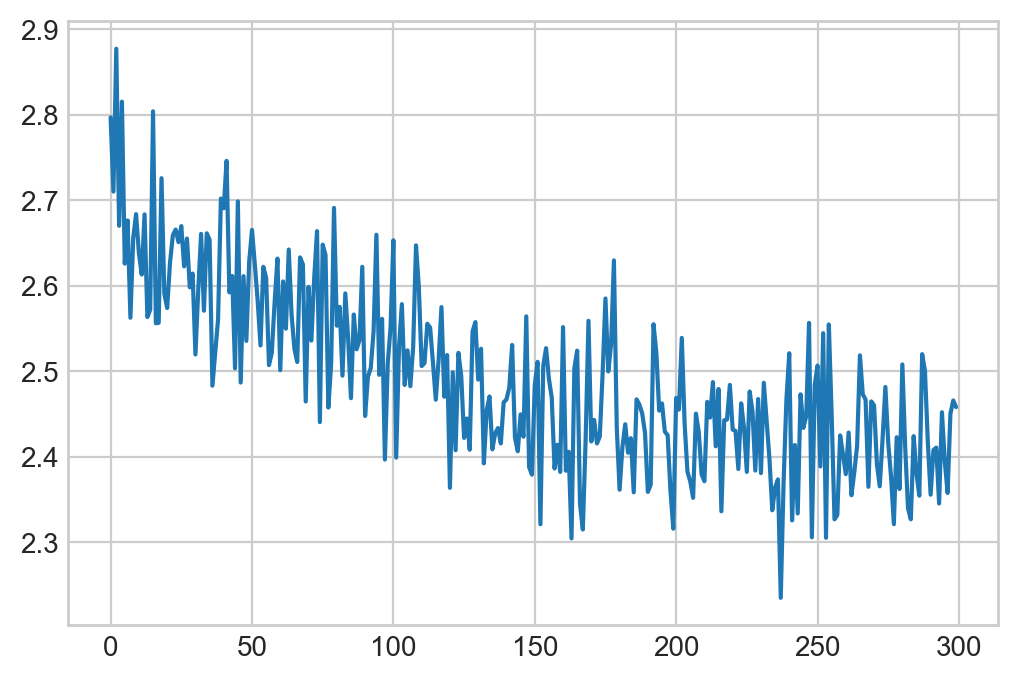

In [74]:


plt.figure(dpi=100)
plt.plot(loss_history)
# plt.ylim([0,0.2])

In [33]:
model.eval()

MyModel(
  (encoder_s): Sequential(
    (0): Linear(in_features=27, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): ReLU()
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): ReLU()
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): ReLU()
  )
  (encoder_a): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=512, out_features